In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ds_salaries.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [6]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
#We will keep only the salary in USD
data = data.drop(['salary','salary_currency'], axis=1)

In [8]:
data = data.drop('employee_residence', axis=1)

In [9]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,100,ES,L
1,2023,MI,CT,ML Engineer,30000,100,US,S
2,2023,MI,CT,ML Engineer,25500,100,US,S
3,2023,SE,FT,Data Scientist,175000,100,CA,M
4,2023,SE,FT,Data Scientist,120000,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,0,US,L
6,2023,SE,FT,Applied Scientist,136000,0,US,L
7,2023,SE,FT,Data Scientist,219000,0,CA,M
8,2023,SE,FT,Data Scientist,141000,0,CA,M
9,2023,SE,FT,Data Scientist,147100,0,US,M


In [10]:
#Sorting salaries by Location
salariesByLocation = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)

In [11]:
#the best locations in term of salary
salariesByLocation.head(3)

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
Name: salary_in_usd, dtype: float64

<AxesSubplot: ylabel='company_location'>

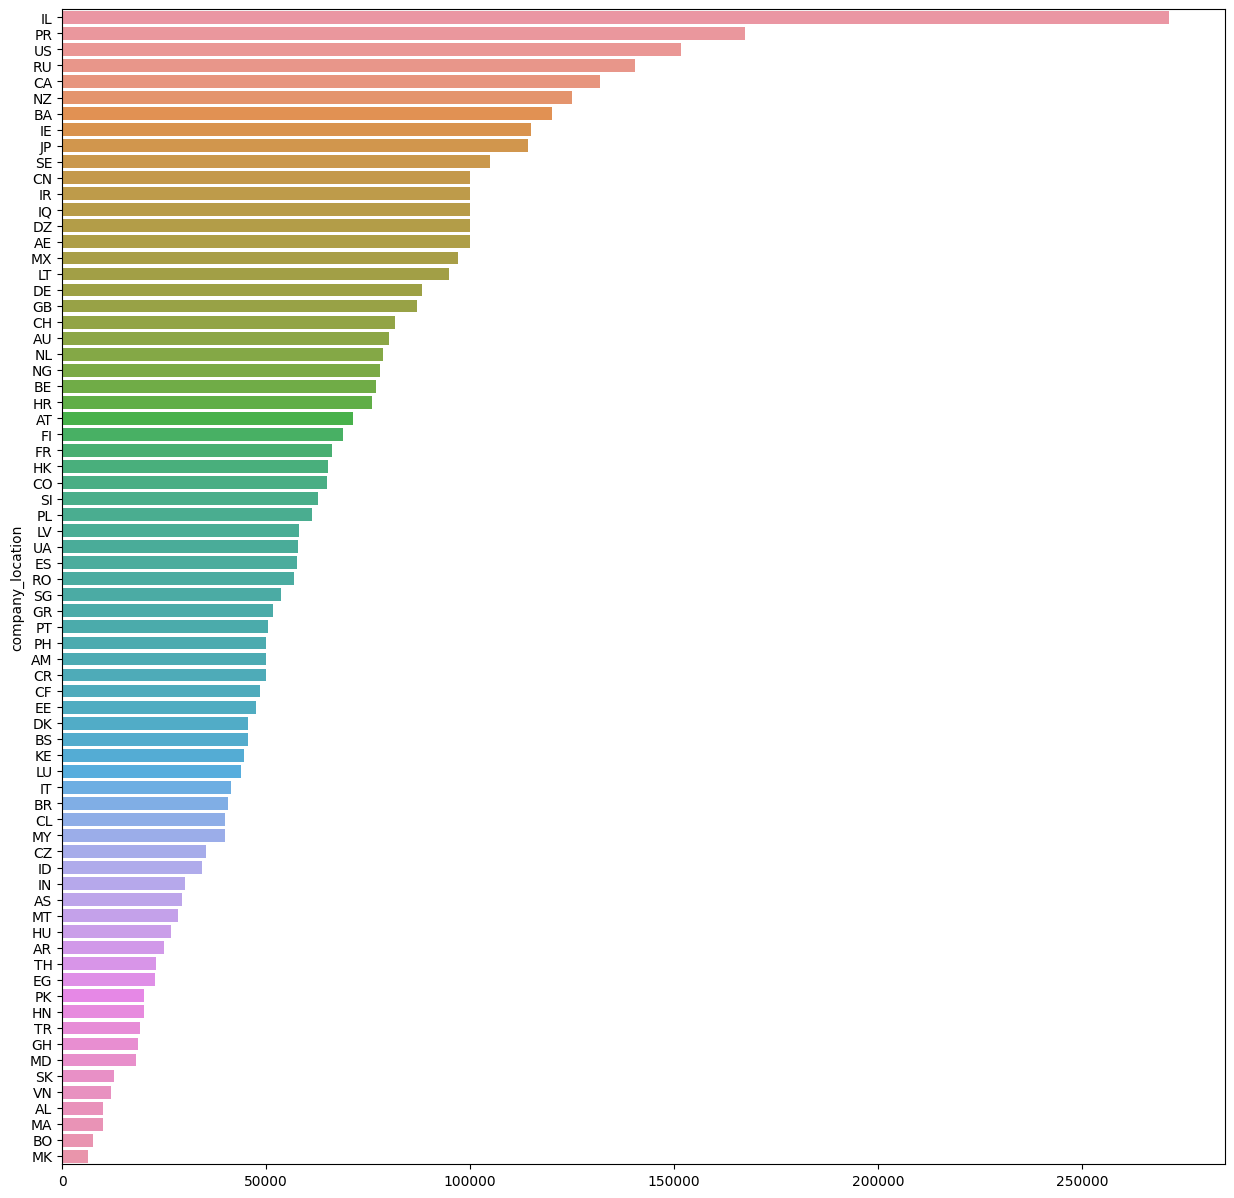

In [12]:
plt.figure(figsize=(15,15))
sns.barplot(y = salariesByLocation.index,x = salariesByLocation.values)

work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64


[]

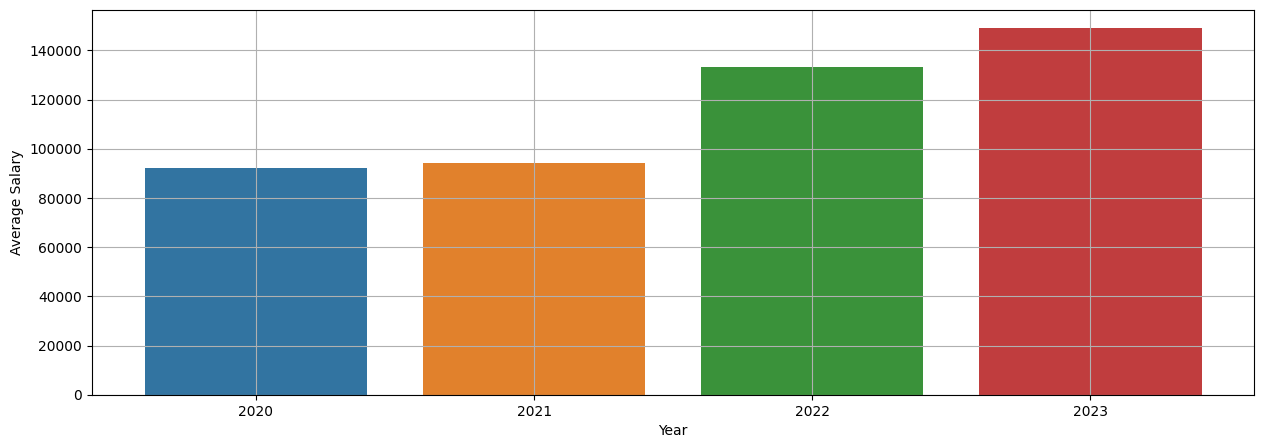

In [13]:
#Sorting salaries by Years
print(data.groupby('work_year')['salary_in_usd'].mean())
plt.figure(figsize=(15,5))
sns.barplot(x=data.groupby('work_year')['salary_in_usd'].mean().index,y=data.groupby('work_year')['salary_in_usd'].mean().values)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.plot()

In [14]:
#Sorting salaries by Jobs
salariesByJob = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

In [15]:
#Finding the best paid jobs
salariesByJob.head(3)

job_title
Data Science Tech Lead    375000.0
Cloud Data Architect      250000.0
Data Lead                 212500.0
Name: salary_in_usd, dtype: float64

In [16]:
#Finding the low paid jobs
salariesByJob.tail(3)

job_title
Staff Data Analyst        15000.0
Product Data Scientist     8000.0
Power BI Developer         5409.0
Name: salary_in_usd, dtype: float64

<AxesSubplot: ylabel='job_title'>

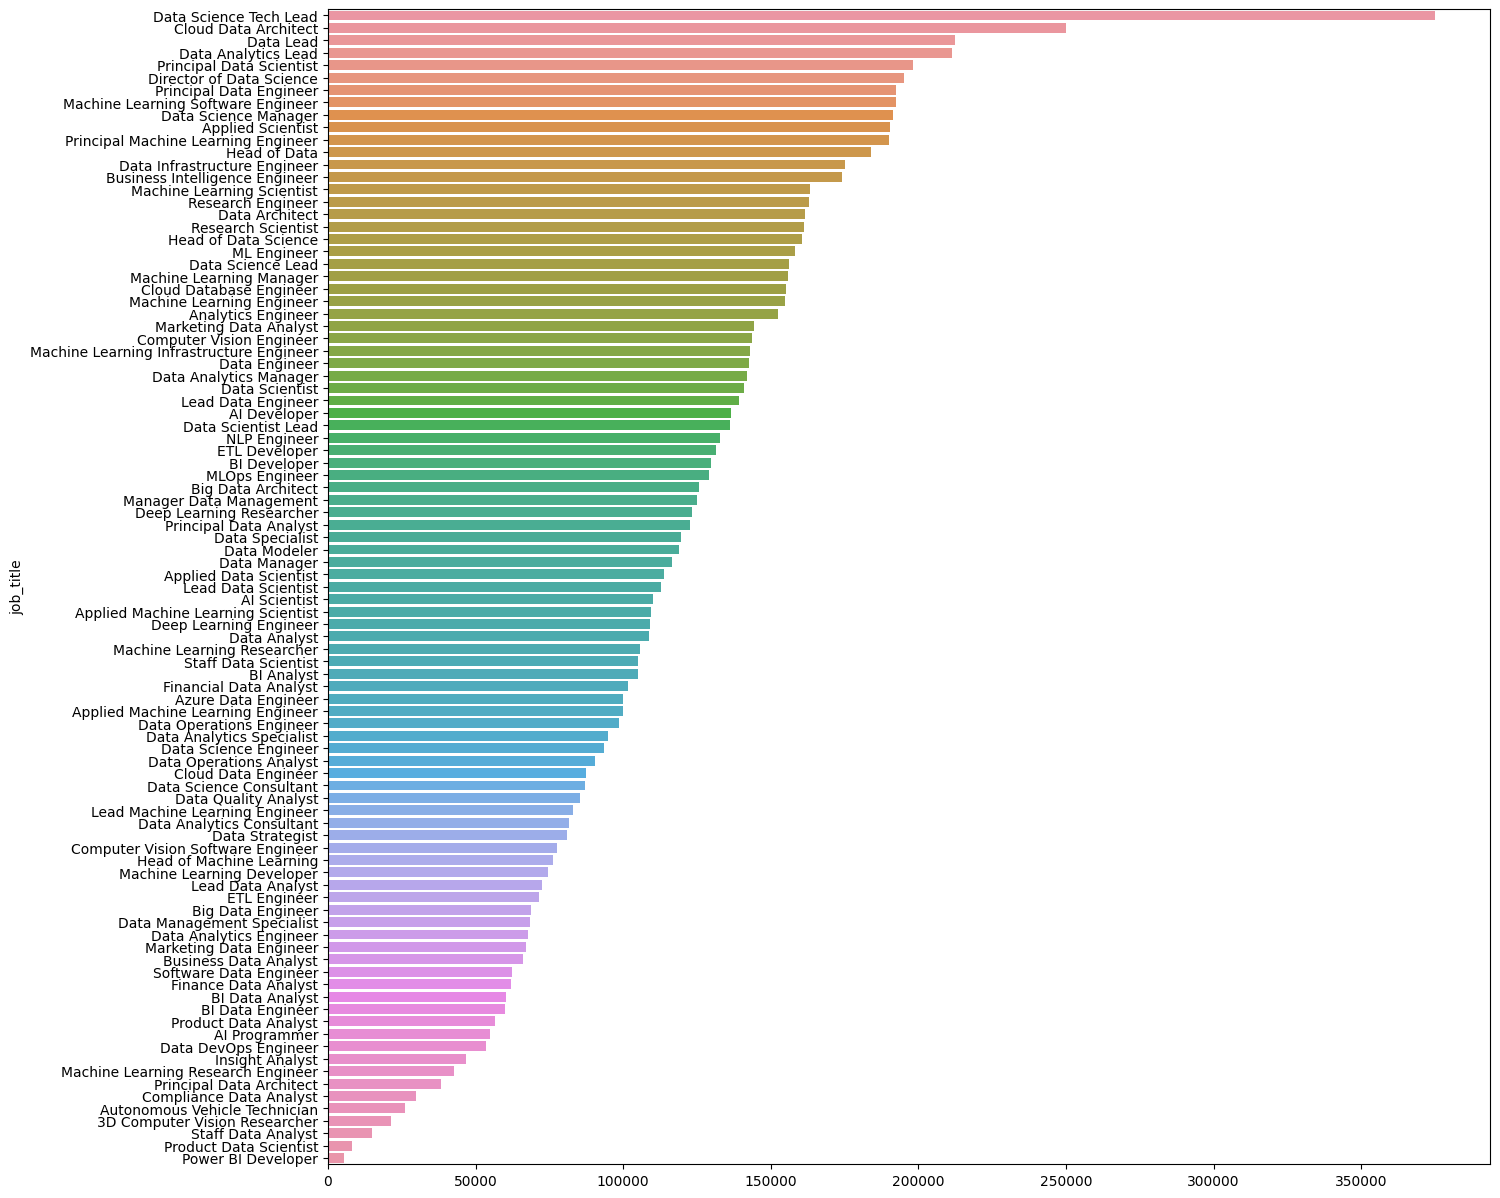

In [17]:
plt.figure(figsize=(15,15))
sns.barplot(y = salariesByJob.index,x = salariesByJob.values)

In [18]:
#Sorting salaries by Companies Size
salariesByCompanySize = data.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)

company_size
M    143130.548367
L    118300.982379
S     78226.682432
Name: salary_in_usd, dtype: float64


[]

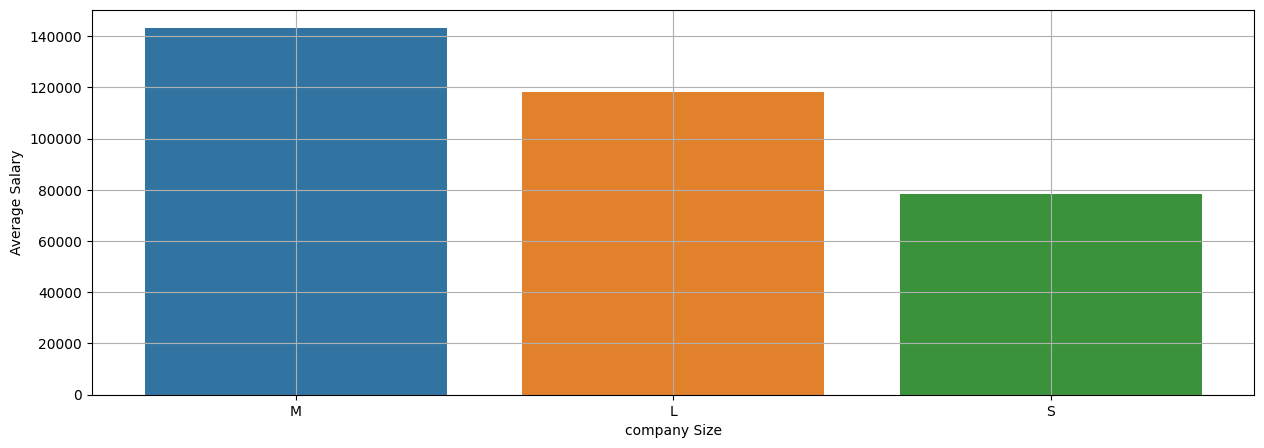

In [19]:
print(salariesByCompanySize)
plt.figure(figsize=(15,5))
sns.barplot(x=salariesByCompanySize.index,y=salariesByCompanySize.values)
plt.grid()
plt.xlabel('company Size')
plt.ylabel('Average Salary')
plt.plot()

In [20]:
#Sorting salaries by Employment Type
salariesByEmploymentType = data.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)

employment_type
FT    138314.199570
CT    113446.900000
FL     51807.800000
PT     39533.705882
Name: salary_in_usd, dtype: float64


<AxesSubplot: xlabel='employment_type'>

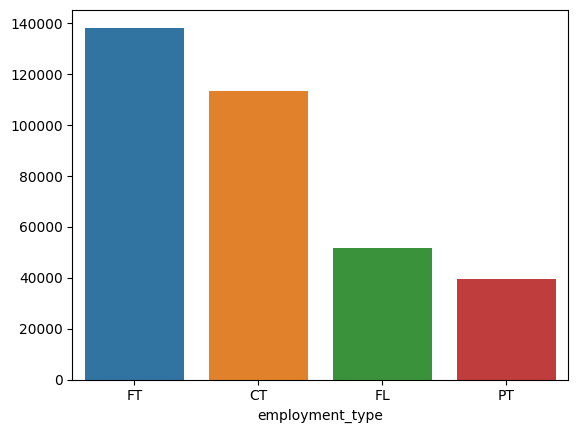

In [21]:
print(salariesByEmploymentType)
sns.barplot(x = salariesByEmploymentType.index,y = salariesByEmploymentType.values)

In [22]:
#Sorting salaries by Eperience Level
salariesByExperienceLevel = data.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True)

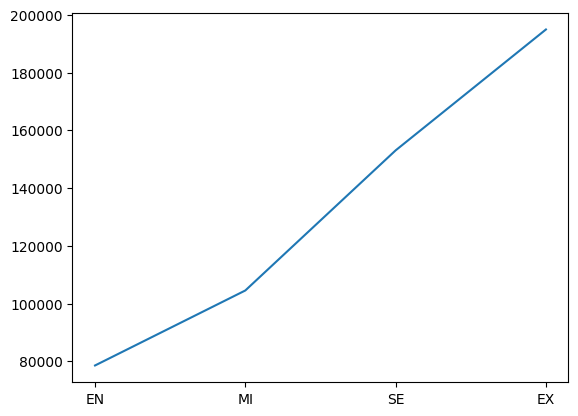

In [23]:
plt.plot(salariesByExperienceLevel.index,salariesByExperienceLevel.values)

([<matplotlib.patches.Wedge at 0x262ab3ce110>,
 [Text(-0.04186374298568906, 1.0992030872515, '0'),
  Text(-0.1317472421160314, -1.0920818028860384, '100'),
  Text(1.0862765725651273, -0.17321434090790483, '50')],
 [Text(-0.022834768901284937, 0.5995653203189999, '51.21%'),
  Text(-0.07186213206328984, -0.5956809833923845, '43.75%'),
  Text(0.592514494126433, -0.09448054958612989, '5.03%')])

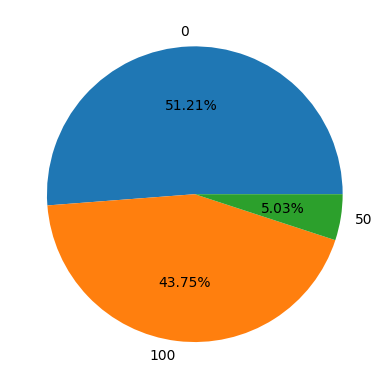

In [24]:
#Ratio of Working remotely
remote = data['remote_ratio'].value_counts()
plt.pie(remote.values,labels=remote.index,autopct="%1.2f%%")

remote_ratio
50      78400.687831
100    136481.452830
0      144316.202288
Name: salary_in_usd, dtype: float64


<AxesSubplot: xlabel='remote_ratio'>

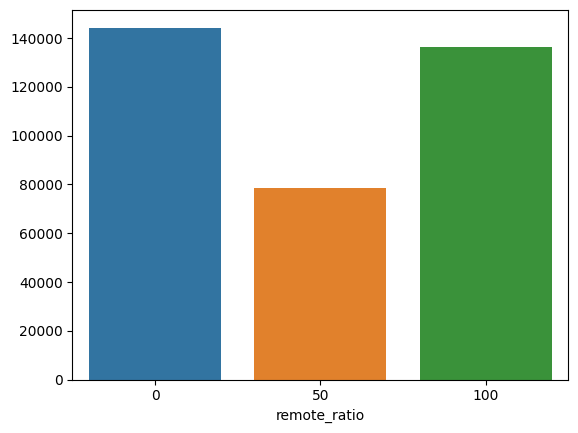

In [25]:
salariesByRemoteRatio = data.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=True)
print(salariesByRemoteRatio)
sns.barplot(x = salariesByRemoteRatio.index,y = salariesByRemoteRatio.values)

In [26]:
#Let's find the hight salary 
salary = np.max(data['salary_in_usd'])
print('The highest salary is',salary,'$')

The highest salary is 450000 $


In [27]:
#Finding the best paid employee's informations
salary = np.argmax(data['salary_in_usd'])
data.iloc[salary]

work_year                         2020
experience_level                    MI
employment_type                     FT
job_title           Research Scientist
salary_in_usd                   450000
remote_ratio                         0
company_location                    US
company_size                         M
Name: 3522, dtype: object